In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
import data_pre_proces
import copy
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [50]:
# Collecting data
data_black_fraiday = pd.read_csv("BlackFriday.csv", header=None,sep=',')
data_black_fraiday.columns = [i for i in  data_black_fraiday.loc[[0]].values[0]]
data_black_fraiday = data_black_fraiday.drop([0])
data_black_fraiday.index = range(data_black_fraiday.shape[0])
data_reserv_data_black_fraiday = copy.deepcopy(data_black_fraiday)
# Print the original version of data
print(data_black_fraiday)

C:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,4,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


        User_ID Product_ID Gender    Age Occupation City_Category  \
0       1000001  P00069042      F   0-17         10             A   
1       1000001  P00248942      F   0-17         10             A   
2       1000001  P00087842      F   0-17         10             A   
3       1000001  P00085442      F   0-17         10             A   
4       1000002  P00285442      M    55+         16             C   
5       1000003  P00193542      M  26-35         15             A   
6       1000004  P00184942      M  46-50          7             B   
7       1000004  P00346142      M  46-50          7             B   
8       1000004   P0097242      M  46-50          7             B   
9       1000005  P00274942      M  26-35         20             A   
10      1000005  P00251242      M  26-35         20             A   
11      1000005  P00014542      M  26-35         20             A   
12      1000005  P00031342      M  26-35         20             A   
13      1000005  P00145042      M 

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


        User_ID  Product_ID  Gender Age  Occupation  City_Category  \
0       1000001       69042       0   0          10              0   
1       1000001      248942       0   0          10              0   
2       1000001       87842       0   0          10              0   
3       1000001       85442       0   0          10              0   
4       1000002      285442       1   6          16              1   
5       1000003      193542       1   2          15              0   
6       1000004      184942       1   4           7              2   
7       1000004      346142       1   4           7              2   
8       1000004       97242       1   4           7              2   
9       1000005      274942       1   2          20              0   
10      1000005      251242       1   2          20              0   
11      1000005       14542       1   2          20              0   
12      1000005       31342       1   2          20              0   
13      1000005     

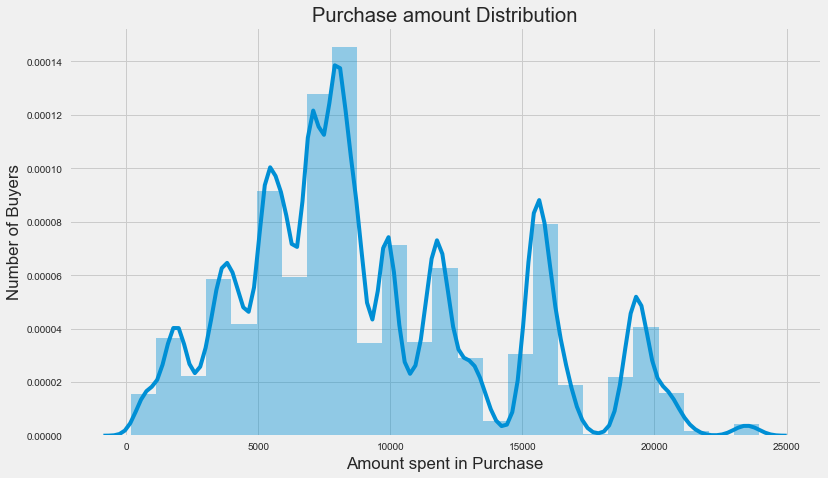

In [51]:
#Modification of data and numeric imputation
dct_for_age = {'0-17': 0, '18-25': 1 ,'26-35': 2, '36-45' : 3, '46-50' : 4, '51-55' : 5, '55+' : 6}
def modification_of_data(data,name_of_col,dct):
    for i in dct.keys():
        data.loc[data[name_of_col] == i, name_of_col] = dct[i]
    return data

data = data_pre_proces.elements_col_to_int(data_black_fraiday,'Gender')
data = modification_of_data(data,'Age',dct_for_age)
data.loc[data['Stay_In_Current_City_Years'] == '4+', 'Stay_In_Current_City_Years'] = '4'
data.Gender = pd.to_numeric(data.Gender)
data.Occupation = pd.to_numeric(data.Occupation)
data = data_pre_proces.elements_col_to_int(data_black_fraiday,'City_Category')
data.Purchase = pd.to_numeric(data.Purchase)
data.Stay_In_Current_City_Years = pd.to_numeric(data.Stay_In_Current_City_Years)
data.Marital_Status = pd.to_numeric(data.Marital_Status)
data.Product_Category_1 = pd.to_numeric(data.Product_Category_1)
data.Product_Category_2 = pd.to_numeric(data.Product_Category_2)
data.Product_Category_3 = pd.to_numeric(data.Product_Category_3)
data['Product_ID'] = data['Product_ID'].str.replace('P00', '')
data.Product_ID = pd.to_numeric(data.Product_ID)
# show the distribution of the price ---> it looks like normal distribution per Number of Buyers 
def plot_show(data,col_name):
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(12,7))
    sns.distplot(data[col_name], bins = 25)
    plt.xlabel("Amount spent in Purchase")
    plt.ylabel("Number of Buyers")
    plt.title("Purchase amount Distribution")
plot_show(data_black_fraiday,'Purchase')    
print(data)

In [52]:
# Data normalization 
Y_reserv = data.Purchase
data = data.drop(["Purchase"], axis=1)
Y_for_regression = (Y_reserv - Y_reserv.min())/(Y_reserv.max() - Y_reserv.min())
data["Purchase"] = Y_for_regression

Purchase                      1.000000
Gender                        0.060086
Occupation                    0.021104
City_Category                 0.010854
Stay_In_Current_City_Years    0.005470
Marital_Status                0.000129
Product_Category_3           -0.022257
Product_ID                   -0.079774
Product_Category_2           -0.209973
Product_Category_1           -0.314125
Name: Purchase, dtype: float64 

Purchase                      1.000000
Gender                        0.060086
Occupation                    0.021104
City_Category                 0.010854
Stay_In_Current_City_Years    0.005470
Marital_Status                0.000129
Product_Category_3           -0.022257
Product_ID                   -0.079774
Product_Category_2           -0.209973
Product_Category_1           -0.314125
Name: Purchase, dtype: float64
Index(['Purchase', 'Gender', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_3',
       'Product_ID'

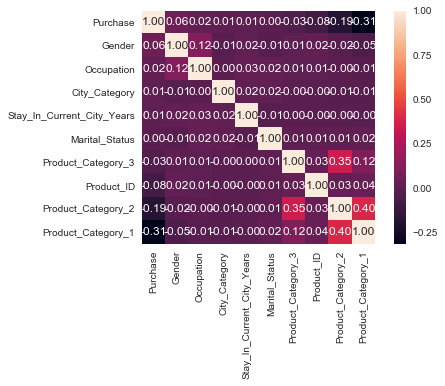

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Product_Category_3            0.0
Purchase                      0.0
dtype: float64


In [53]:
numeric_features = data.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print (corr['Purchase'].sort_values(ascending=False)[:10], '\n')
print (corr['Purchase'].sort_values(ascending=False)[-10:])

correlation = data.corr(method='pearson')
columns = correlation.nlargest(10, "Purchase").index
print(columns)
#Looking for missing values and make them == to mean
data['Product_Category_3']= \
data['Product_Category_3'].fillna(round(data['Product_Category_3'].mean(),0)).astype('float')
data.Product_Category_3.value_counts().sort_index()
print(data['Product_Category_3'])
#################################################
#################################################
#################################################
data['Product_Category_2']= \
data['Product_Category_2'].fillna(round(data['Product_Category_2'].mean(),0)).astype('float')
data.Product_Category_3.value_counts().sort_index()
print(data['Product_Category_2'])
#################################################
#################################################
#################################################
# Lets start correlation analisis
# First how all fitches are correlated with Purchase 
correlation_map = np.corrcoef(data[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
plt.show()
# Image ---> correlation matrix ==> you can see that Product_Category_1,2,3 have the best coreliation 
# It mens that I should predict purchase by these Product_Category_1,2,3 and try to predict Product_Category_1,2,3 from another features 
print(data.isnull().sum()/data.shape[0]*100)

In [54]:
#Stay_In_Current_City_Years to binary
le = LabelEncoder()
data['Stay_In_Current_City_Years'] = le.fit_transform(data['Stay_In_Current_City_Years'])
data = pd.get_dummies(data, columns=['Stay_In_Current_City_Years'])
print(data)

        User_ID  Product_ID  Gender Age  Occupation  City_Category  \
0       1000001       69042       0   0          10              0   
1       1000001      248942       0   0          10              0   
2       1000001       87842       0   0          10              0   
3       1000001       85442       0   0          10              0   
4       1000002      285442       1   6          16              1   
5       1000003      193542       1   2          15              0   
6       1000004      184942       1   4           7              2   
7       1000004      346142       1   4           7              2   
8       1000004       97242       1   4           7              2   
9       1000005      274942       1   2          20              0   
10      1000005      251242       1   2          20              0   
11      1000005       14542       1   2          20              0   
12      1000005       31342       1   2          20              0   
13      1000005     

In [55]:
# Predictors from matrix of corelations !!!!
target = 'Purchase'
train_df, test_df, Y_train, Y_test =  train_test_split (data, data[target], test_size = 0.20, random_state=42)
predictors = train_df.columns.drop(['Purchase','Product_ID','User_ID'])
# function for training/trying diferent model
def modelfit(alg, dtrain, dtest, predictors, target):
    X_train = dtrain[predictors]
    Y_train = dtrain[target]
    X_test = dtest[predictors]
    Y_test = dtest[target]
    
    alg.fit(X_train, dtrain[target])
    dtrain_predictions = alg.predict(X_train)

    cv_score = cross_validate(alg, X_train,(dtrain[target]) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score['fit_time']))
    
    #Print model report:
    print("Model Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((dtrain[target]).values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    y_pred = alg.predict(X_test)
    y_true = np.array(dtest[target])
    print(alg.score(X_test,Y_test))
    return alg

In [56]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)
LR_model = modelfit(LR, train_df, test_df, predictors, target)

Model Report
RMSE : 0.1978
CV Score : Mean - 0.762 | Std - 0.01627 | Min - 0.7326 | Max - 0.7979
0.10426824492489062


In [57]:
from sklearn.tree import DecisionTreeRegressor
model_DecisionTreeRegressor = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
model_DecisionTreeRegressor = modelfit(model_DecisionTreeRegressor, train_df, test_df, predictors, target)

Model Report
RMSE : 0.1228
CV Score : Mean - 1.23 | Std - 0.01101 | Min - 1.219 | Max - 1.262
0.647810590973579


In [59]:
from sklearn.linear_model import Ridge
model_Ridge = Ridge(alpha=0.05,normalize=True)
model_Ridge = modelfit(model_Ridge, train_df, test_df, predictors, target)

Model Report
RMSE : 0.1979
CV Score : Mean - 0.6907 | Std - 0.01355 | Min - 0.6691 | Max - 0.7139
0.10422373852614264


In [61]:
Lasso = linear_model.Lasso(alpha=0.1)
model_Lasso = modelfit(Lasso, train_df, test_df, predictors, target)

Model Report
RMSE : 0.2006
CV Score : Mean - 0.7569 | Std - 0.01081 | Min - 0.7407 | Max - 0.7865
0.08086584970452504


In [63]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
sfs1 = sfs(model_DecisionTreeRegressor,k_features=13,forward=True,floating=False,verbose=2,scoring='neg_mean_squared_error',cv=5)
sfs1 = sfs1.fit(train_df[predictors], train_df[target])
print(list(sfs1.k_feature_idx_))
lst = list(sfs1.k_feature_idx_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    3.7s finished

[2019-01-26 14:57:55] Features: 1/13 -- score: -0.016330923263983565[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   10.1s finished

[2019-01-26 14:58:05] Features: 2/13 -- score: -0.015993463213289132[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   16.2s finished

[2019-01-26 14:58:22] Features: 3/13 -- score: -0.01543074885938477[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.8s finished

[2019-01-26 15:01:58] Features: 13/13 -- score: -0.01544147330160701

In [64]:
print("Final model")
model1 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
final_model = modelfit(model1, train_df, test_df, pd.core.indexes.base.Index(sfs1.subsets_[4]['feature_names']), target)

Final model
Model Report
RMSE : 0.1237
CV Score : Mean - 0.5801 | Std - 0.006546 | Min - 0.5708 | Max - 0.5923
0.6481451440016
